# Ch06 Pandas DataFrame 特徵工程

# Outline
- Data Exploration
- Feature Cleaning
- Feature Engineering
- Feature Selection

## Data Exploration

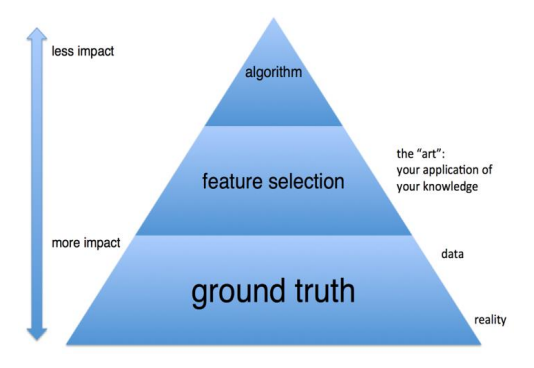


### ML Flow Life Cycle

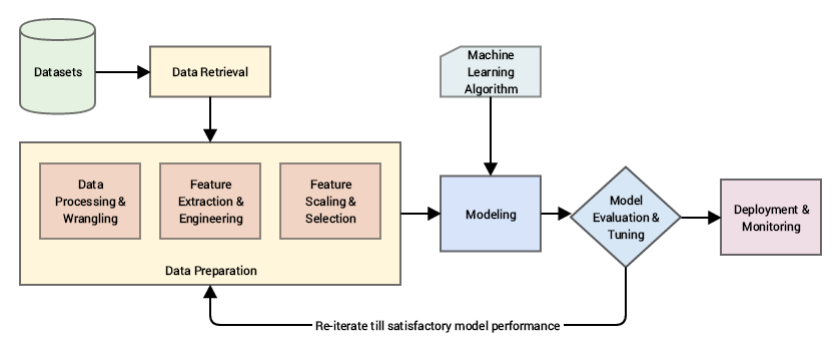

- STEP1 Datasets:
數據集是整個流程的起點，包含了原始數據。

- STEP2 Data Retrieval:
從數據倉庫或數據庫中提取所需數據的過程。

- STEP3 Data Processing & Wrangling:
數據清洗和整理，包括處理缺失值、異常值、錯誤數據、格式化等。

- STEP4 Feature Extraction & Engineering:
特徵提取和特徵工程，涉及從原始數據中創建有助於機器學習模型的新特徵。

- STEP5 Feature Scaling & Selection:
特徵縮放和選擇，包括標準化和歸一化數據，以及選擇最有影響力的特徵用於訓練模型。

- STEP6 Modeling:
建模階段，使用選擇的特徵訓練機器學習算法。

- STEP7 Machine Learning Algorithm:
在建模過程中應用的具體機器學習算法。

- STEP8 Model Evaluation & Tuning:
評估模型的性能，並調整參數以改善結果。

- STEP9 Deployment & Monitoring:
部署模型到生產環境並持續監控其性能。

In [37]:
import numpy as np
import pandas as pd
from pprint import pprint

In [38]:
pd.__version__

'2.1.2'

## 變數區別 - 以資料類型劃分 (類別 和 數值)

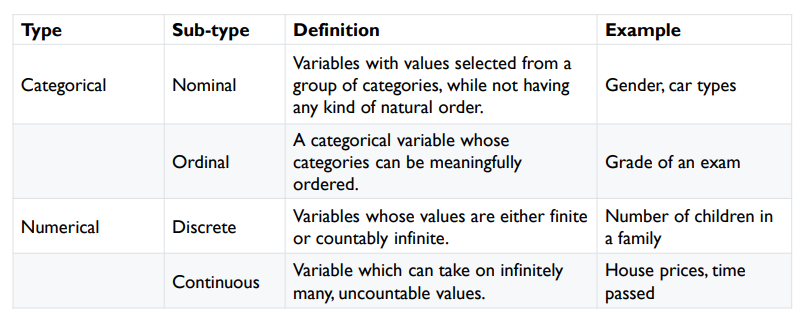

## 分析類型區別 - 以變數個數劃分

## Univariate Analysis (單變量分析)

Descriptive statistics on one single variable

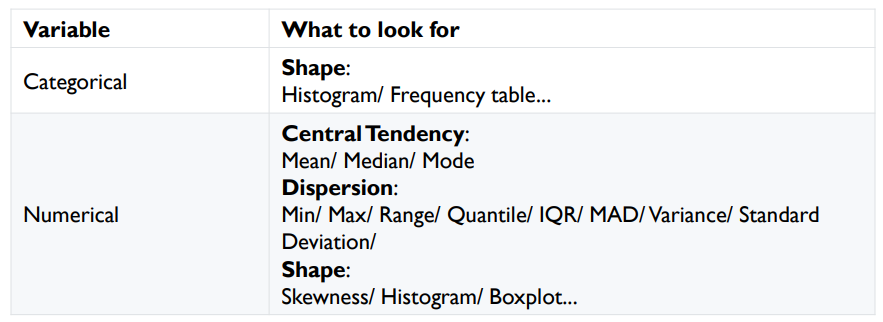

## Categorical
### 直方圖 Histogram

In [1]:
# 0.12.2
import seaborn as sns
sns.__version__

'0.13.2'

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()

data = np.concatenate((iris['data'], iris['target'].reshape(-1,1)), axis=1)
columns= iris['feature_names'] + ['target']
df_iris = pd.DataFrame(data=data, columns=columns)

# Map the target numbers to species names
df_iris['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

df_iris


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


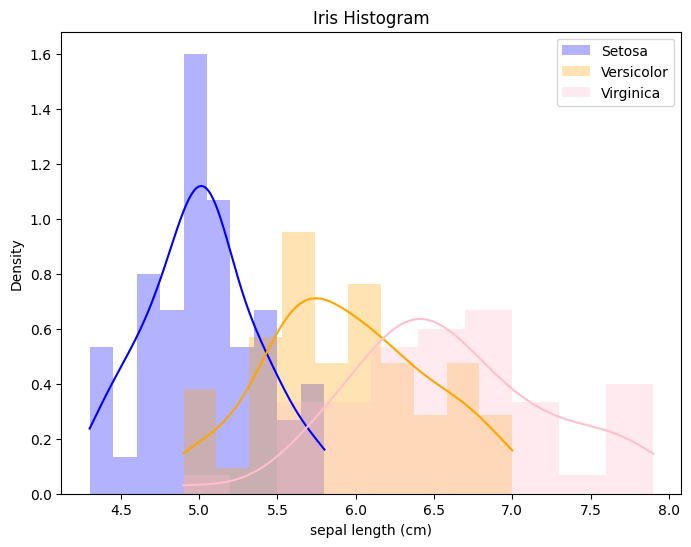

In [55]:
# Plotting the histogram
plt.figure(figsize=(8, 6))
# Set the transparency level with alpha and choose the appropriate bins
sns.histplot(df_iris[df_iris["species"] == 'setosa'], x="sepal length (cm)", color="blue", label="Setosa", kde=True, stat="density", bins=10, alpha=0.3, edgecolor=None)
sns.histplot(df_iris[df_iris["species"] == 'versicolor'], x="sepal length (cm)", color="orange", label="Versicolor", kde=True, stat="density", bins=10, alpha=0.3, edgecolor=None)
sns.histplot(df_iris[df_iris["species"] == 'virginica'], x="sepal length (cm)", color="pink", label="Virginica", kde=True, stat="density", bins=10, alpha=0.3, edgecolor=None)

# Adding legend
plt.legend()
# Adding titles and labels
plt.title('Iris Histogram')
plt.xlabel('sepal length (cm)')
plt.ylabel('Density')

# Show the plot
plt.show()


### 計數表 Frequency table

- Score: Original scores from the table.
- Frequency: Number of occurrences for each score.
- Weighted Score: Each score multiplied by its frequency.
- Cumulative Frequency: The cumulative sum of the frequencies as you go down the table.
- Relative Frequency: The frequency of each score divided by the total number of occurrences.

In [52]:
# Replace the df with the expanded raw scores DataFrame
df_raw = pd.DataFrame({'Score': [6, 6, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10]})

# Calculate the frequency for each score using groupby
df_grouped = df_raw.groupby('Score').size().reset_index(name='Frequency')

# Perform feature engineering on the grouped data
df_grouped['Weighted_Score'] = df_grouped['Score'] * df_grouped['Frequency']
df_grouped['Cumulative_Frequency'] = df_grouped['Frequency'].cumsum()
df_grouped['Relative_Frequency'] = df_grouped['Frequency'] / df_grouped['Frequency'].sum()
df_grouped["median absolute deviation (MAD)"] = df_grouped["Score"] - df_grouped["Score"].mean()

df_grouped


,Score,Frequency,Weighted_Score,Cumulative_Frequency,Relative_Frequency,median absolute deviation (MAD)
0,6,2,12,2,0.10,-2.0
1,7,3,21,5,0.15,-1.0
2,8,7,56,12,0.35,0.0
3,9,7,63,19,0.35,1.0
4,10,1,10,20,0.05,2.0


## Numerical - Dispersion

### median, Q1, Q3, IQR

In [49]:
# First, let's define the two datasets from the image
data1 = np.array([6, 6, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10])

# Now, we calculate the median, Q1, Q3, and IQR for both datasets
statistics_data1 = {
    'mean':np.mean(data1),
    'median': np.median(data1),
    'min':np.min(data1),
    'max': np.max(data1),
    'count':np.size(data1),
    'Q1': np.percentile(data1, 25),
    'Q3': np.percentile(data1, 75),
    'IQR': np.percentile(data1, 75) - np.percentile(data1, 25),
    'Std': np.std(data1),
    'Var': np.var(data1),
    'skewness': pd.Series(data1).skew(),
}

df = pd.DataFrame([statistics_data1])

df


,mean,median,min,max,count,Q1,Q3,IQR,Std,Var,skewness
0,8.1,8.0,6,10,20,7.75,9.0,1.25,1.044031,1.09,-0.502474


## Bi-variate Analysis (多變量分析)

Descriptive statistics between two or more variables.
Usually use Scatter Plot, Correlation Plot

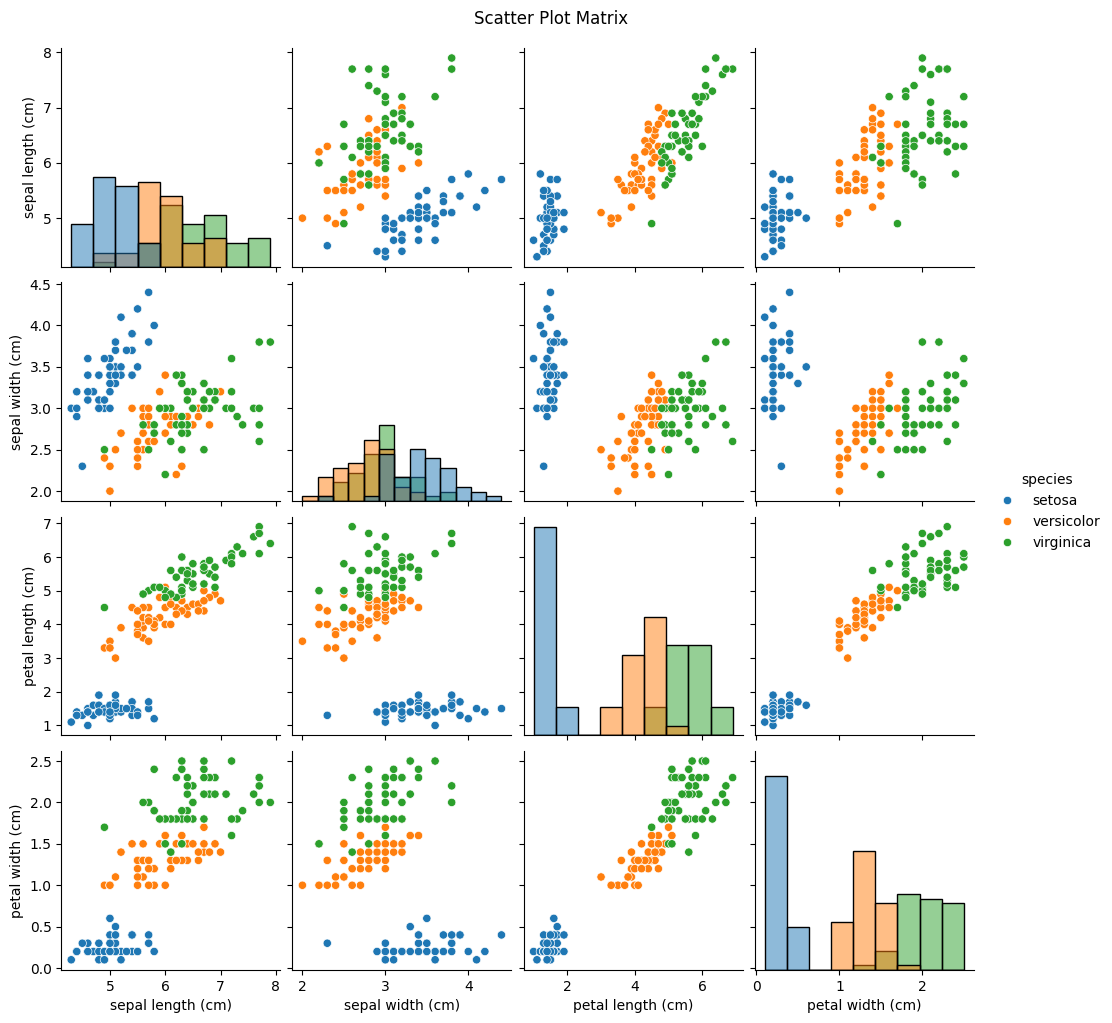

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

# Load an example dataset
iris = datasets.load_iris()
data = iris.data
feature_names = iris.feature_names
target = iris.target

# Create a DataFrame with the data and the species
import pandas as pd
iris_df = pd.DataFrame(data, columns=feature_names)
iris_df['species'] = pd.Categorical.from_codes(target, iris.target_names)

# Use seaborn's pairplot function to create the scatter plot matrix
sns.pairplot(iris_df, hue='species', diag_kind='hist')

# Adjust the plot
plt.suptitle("Scatter Plot Matrix", y=1.02) # Adjust the title location
plt.show()


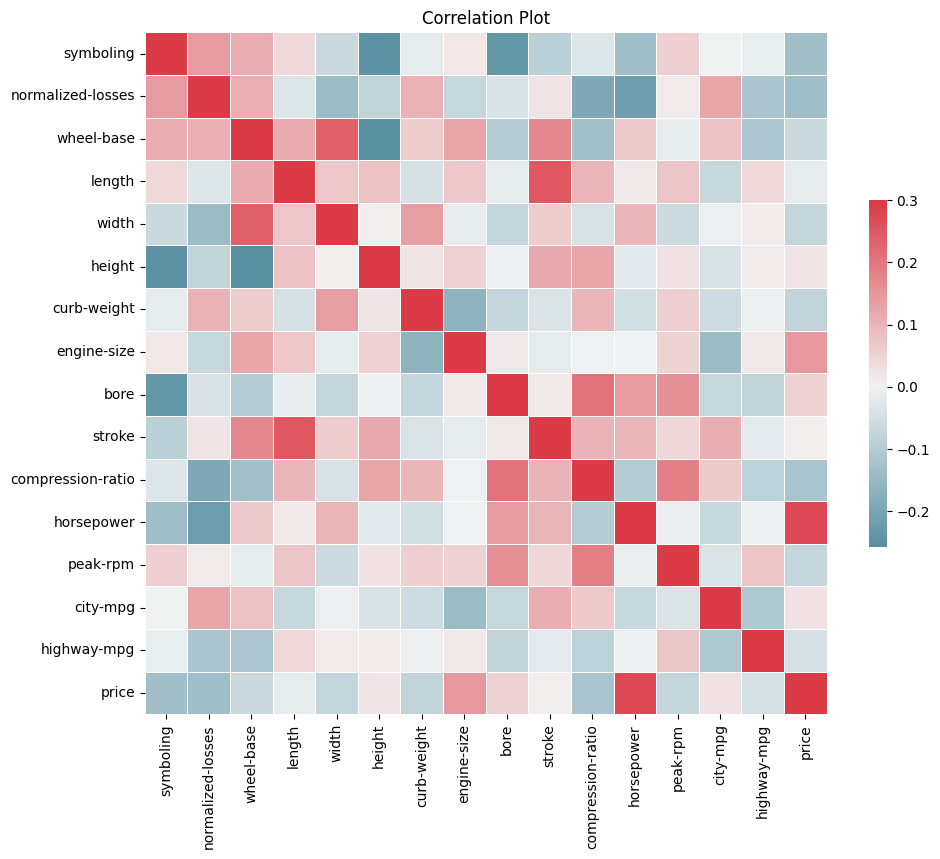

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# For demonstration, let's create a random DataFrame with some correlated data
# In practice, you would load your dataset here

data = np.random.rand(100, 16)  # Creating a 100x15 matrix of random numbers
columns = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height',
           'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
           'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
df = pd.DataFrame(data, columns=columns)

# Now, compute the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Set the title
plt.title('Correlation Plot')

# Show the plot
plt.show()
